<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [30]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [31]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [32]:
len(X_train)

60000

In [33]:
len(X_test)

10000

In [34]:
X_train[0].shape

(28, 28)

In [35]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

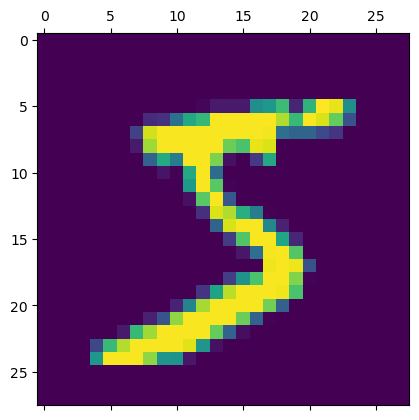

In [36]:
plt.matshow(X_train[0])

In [37]:
y_train[0]

5

In [38]:
X_train = X_train / 255
X_test = X_test / 255

In [39]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [40]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [41]:
X_train_flattened.shape

(60000, 784)

In [42]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

In [43]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4670 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3041 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2833 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2732 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2663 - accuracy: 0.9258


In [44]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 853us/step - loss: 0.2670 - accuracy: 0.9259


[0.2669709622859955, 0.9258999824523926]

In [45]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 847us/step


array([2.50065047e-02, 2.76491221e-07, 7.42764920e-02, 9.54658687e-01,
       2.86882231e-03, 1.16881624e-01, 1.57560407e-06, 9.99739885e-01,
       1.13156438e-01, 7.09303439e-01], dtype=float32)

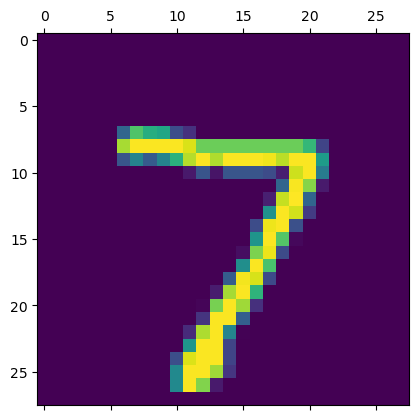

In [46]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [47]:
np.argmax(y_predicted[0])

7

In [48]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [49]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [50]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   9,   10,  923,   11,   10,    2,   12,    9,   42,    4],
       [   5,    0,   21,  910,    1,   30,    2,    9,   23,    9],
       [   2,    1,    4,    1,  931,    0,    8,    3,    8,   24],
       [  12,    3,    2,   25,   11,  782,   14,    6,   31,    6],
       [  15,    3,    8,    1,    8,   12,  906,    2,    3,    0],
       [   1,    5,   23,    5,    9,    0,    0,  947,    3,   35],
       [  10,   10,    5,   19,    9,   25,    8,   11,  868,    9],
       [  11,    7,    1,    9,   37,    7,    0,   23,    5,  909]])>

Text(95.72222222222221, 0.5, 'Truth')

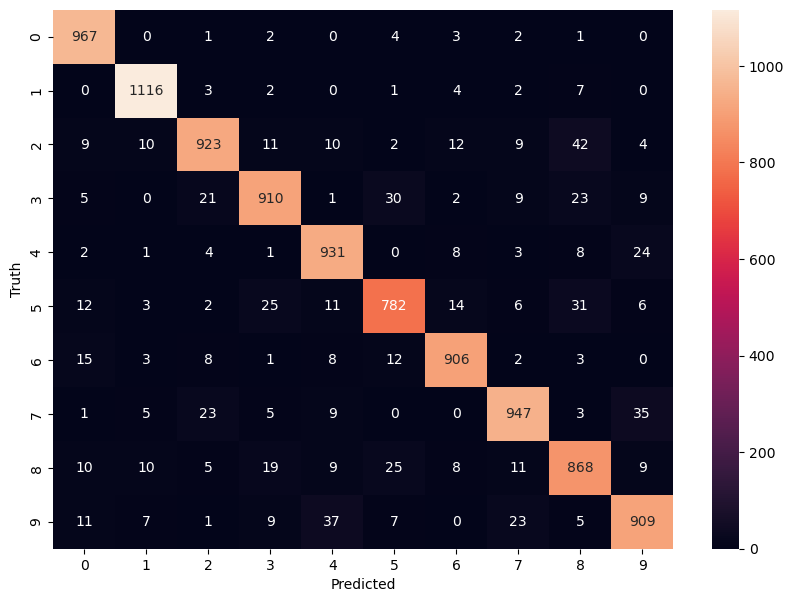

In [51]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [52]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2730 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1203 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0846 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0641 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0505 - accuracy: 0.9842


In [53]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0798 - accuracy: 0.9749


[0.07984840869903564, 0.9749000072479248]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

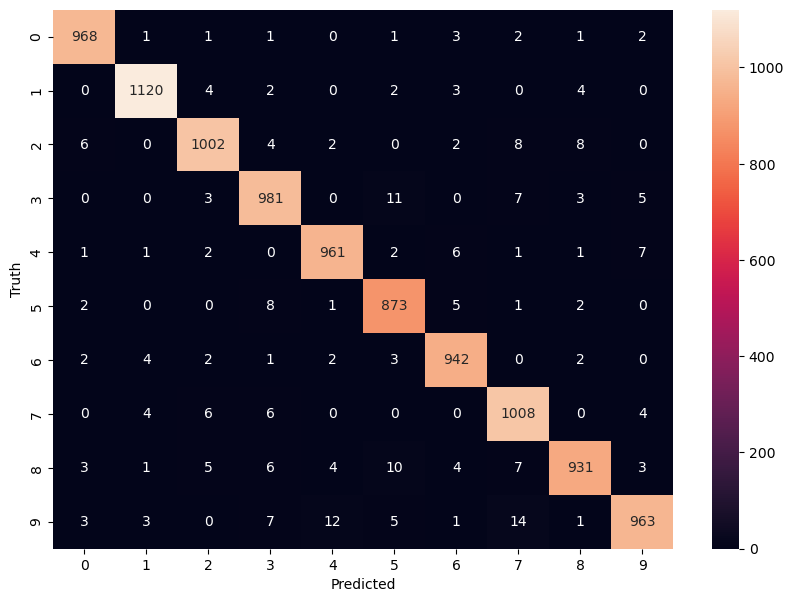

In [54]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [55]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2692 - accuracy: 0.9228
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1204 - accuracy: 0.9645
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0842 - accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0635 - accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0502 - accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0404 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0330 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0267 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0225 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - loss:

In [56]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0775 - accuracy: 0.9777


[0.07754500210285187, 0.9776999950408936]